In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import seaborn as sns
from tqdm import tqdm
import pandas as pd

from konlpy.tag import Kkma, Komoran, Okt, Hannanum, Mecab

han = Hannanum()
mec = Mecab()
okt = Okt()
kkm = Kkma()
kom = Komoran()

number = 1000

texts = pd.read_table('./data/hgu_clean.kr', sep ='\n')[:number]
texts = texts['26일이요?']
texts.head(10)
texts.shape

(1000,)

100%|██████████| 1000/1000 [00:06<00:00, 149.93it/s]


Text(0, 0.5, 'total seconds')

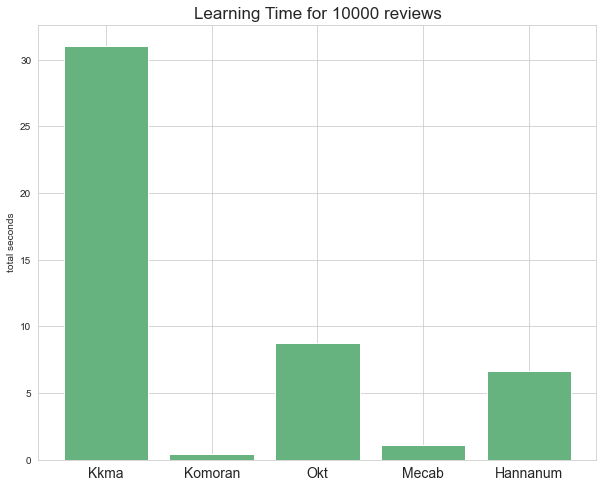

In [2]:
def tagger_time(tagger, texts):
    time_sum = 0

    for sentence in tqdm(texts):
        t1 = time.time()
        try:
            tagger.morphs(sentence)
        except:
            pass
        t2 = time.time()

        time_sum += (t2 - t1)

    return time_sum

#texts = train['document'][:number]
time_list = []

for tagger in [kkm, kom, okt, mec, han]:
    time_list.append(tagger_time(tagger, texts))

sns.set_style('whitegrid')

tagger = ['Kkma', 'Komoran', 'Okt', 'Mecab', 'Hannanum']

plt.figure(figsize=(10,8))
plt.bar(tagger, time_list, color=(0.4,0.7,0.5))
plt.title('Learning Time for 10000 reviews', fontsize=17)
plt.xticks(fontsize=14)
plt.ylabel('total seconds')



In [3]:
domain = range(0,number)
#el_list = []
def tagger_tracker(tagger, text):
    time_sum = 0
    el_list = []
    
    for sentence in tqdm(texts):
        t1 = time.time()
        try:
            tagger.morphs(sentence)
        except:
            pass
        t2 = time.time()
        
        time_sum += (t2 - t1)
        el_list.append(time_sum)
    
    return el_list

#texts0 = train['document'][:number]
lists = []

for tagger in [kkm, kom, okt, mec, han]:
    lists.append(tagger_tracker(tagger, texts))
    
#for i in range(0,5):
 #   plt.plot(domain, lists[i])

#plt.show()

lists[0][:500]

100%|██████████| 1000/1000 [00:01<00:00, 556.05it/s]


[0.004257917404174805,
 0.02079033851623535,
 0.02872014045715332,
 0.03729701042175293,
 0.0450592041015625,
 0.05784416198730469,
 0.06035590171813965,
 0.07852292060852051,
 0.0924220085144043,
 0.10188603401184082,
 0.11452293395996094,
 0.12282109260559082,
 0.13212108612060547,
 0.18787717819213867,
 0.20911931991577148,
 0.22062134742736816,
 0.23735833168029785,
 0.24143719673156738,
 0.24715209007263184,
 0.2512400150299072,
 0.27778100967407227,
 0.2883121967315674,
 0.29808735847473145,
 0.30014634132385254,
 0.30954551696777344,
 0.32065320014953613,
 0.3273348808288574,
 0.34009480476379395,
 0.36595916748046875,
 0.3841369152069092,
 0.40016984939575195,
 0.4034276008605957,
 0.40503644943237305,
 0.4144742488861084,
 0.42259812355041504,
 0.42661619186401367,
 0.43277931213378906,
 0.43546438217163086,
 0.4416475296020508,
 0.46115756034851074,
 0.4646275043487549,
 0.4690544605255127,
 0.473238468170166,
 0.48198652267456055,
 0.48458337783813477,
 0.5448136329650879,
 

In [4]:
tagger1 = ['Kkma', 'Komoran', 'Okt', 'Mecab', 'Hannanum']

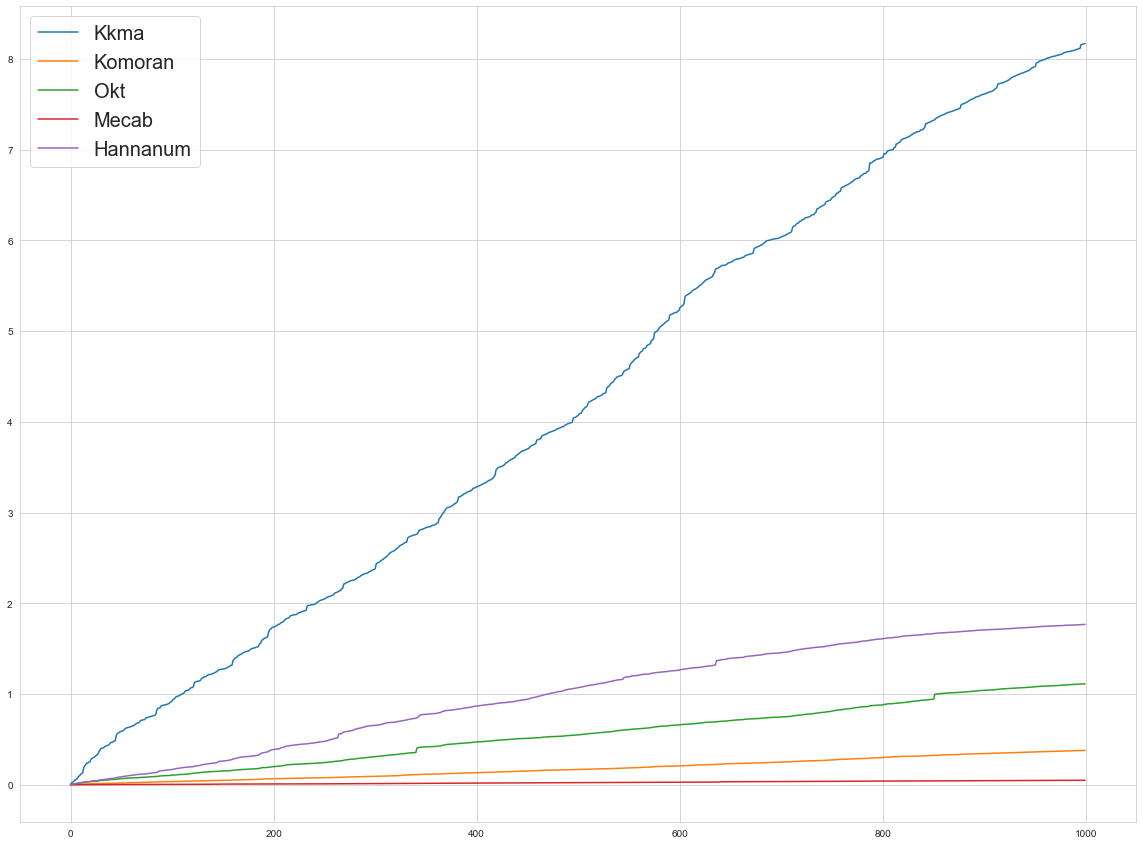

In [5]:
plt.figure(figsize=(20,15))

for i, name in enumerate(tagger1):
    plt.plot(domain, lists[i], label = name)
    plt.legend(fontsize = 20)

plt.show()